# Estimators

### Estimating context trees using CTM/BIC

In [1]:
import sys
sys.path.insert(0,'../..')
from g4l.estimators.bic import BIC
from g4l.data import Sample
from g4l.bootstrap.resampling import BlockResampling
from g4l.bootstrap import Bootstrap
import numpy as np

In [2]:
# 1. Create a Sample object
sample_file = 'resources/samples/model1_5000_s001.txt'
X = Sample(sample_file, [0, 1])
print('sample loaded:', X.data[0:40], '...')

sample loaded: 1001010100101010101010100101010010101001 ...


In [7]:
penalty_constant = 0.1
max_depth = 6

# 2. Instantiate the estimator
bic = BIC(penalty_constant, max_depth)

# 3. Estimate model using the loaded sample
bic.fit(X)

# 4. Collect the estimated model
tree = bic.context_tree
# TODO: adicionar parâmetro para modificar visualização da string
print('Nodes:', tree.to_str())
print('Log-likelihood:', round(tree.log_likelihood(), 4))
print('# of contexts:', tree.num_contexts())

Nodes: 000 1 10 100
Log-likelihood: -1658.0061
# of contexts: 4


In [8]:
# Complete information regarding nodes are available in the returned object

# Listing contexts (Pandas DataFrame object):
tree.tree()

,node_idx,depth_idx,node,freq,active,depth,parent_idx,likelihood,active_children,num_child_nodes,likelihood_pen,v_node,v_node_sum,indicator,comp_aux
10,10,10,000,147,1,3,4,-79.502509,0.0,2.0,-80.354228,-80.354228,-80.733448,0,False
1,1,1,1,2114,1,1,0,0.000000,0.0,1.0,-0.851719,-0.851719,-0.851719,0,False
3,3,3,10,2113,1,2,2,-1283.125824,0.0,1.0,-1283.977543,-1282.758867,-1282.758867,1,False
6,6,6,100,625,1,3,4,-295.377750,0.0,1.0,-296.229469,-296.029865,-296.029865,1,False


In [9]:
# Listing all nodes:
tree.df.head(10) # truncated to 10 first rows for best viz

,node_idx,depth_idx,node,freq,active,depth,parent_idx,likelihood,active_children,num_child_nodes,likelihood_pen,v_node,v_node_sum,indicator,comp_aux
0,0,0,,4999,0,0,-1,-3405.348778,1.0,2.0,-3406.200497,-1659.994679,-1659.994679,1,False
1,1,1,1,2114,1,1,0,0.000000,0.0,1.0,-0.851719,-0.851719,-0.851719,0,False
2,2,2,0,2885,0,1,0,-1675.746574,1.0,2.0,-1676.598294,-1659.142960,-1659.142960,1,False
3,3,3,10,2113,1,2,2,-1283.125824,0.0,1.0,-1283.977543,-1282.758867,-1282.758867,1,False
4,4,4,00,772,0,2,2,-375.827701,2.0,2.0,-376.679421,-376.384093,-376.384093,1,False
5,5,5,01,2113,0,2,1,0.000000,0.0,2.0,-0.851719,-0.851719,-1.703439,0,False
6,6,6,100,625,1,3,4,-295.377750,0.0,1.0,-296.229469,-296.029865,-296.029865,1,False
7,7,7,001,625,0,3,5,0.000000,0.0,2.0,-0.851719,-0.851719,-1.703439,0,False
8,8,8,010,2112,0,3,3,-1281.907148,0.0,2.0,-1282.758867,-1282.758867,-1283.044372,0,False
9,9,9,101,1488,0,3,5,0.000000,0.0,1.0,-0.851719,-0.851719,-0.851719,0,False


In [10]:
# Transition probabilities associated to the nodes
tree.transition_probs.head(10)

,idx,next_symbol,freq,prob,likelihood
0,0,0,2885,0.577115,-1585.921983
1,0,1,2114,0.422885,-1819.426795
2,1,0,2114,1.000000,0.000000
3,1,1,0,0.000000,NaN
4,2,0,772,0.267591,-1017.724226
5,2,1,2113,0.732409,-658.022349
6,3,0,625,0.295788,-761.320230
7,3,1,1488,0.704212,-521.805594
8,4,0,147,0.190415,-243.807139
9,4,1,625,0.809585,-132.020563


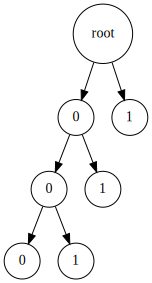

In [11]:
# A visual representation of the obtained tree:
import g4l.display
g4l.display.draw_tree(tree, size='200,400')